# Weather trends analysis 

I am living in London, UK. The life in the city is great but people like to complain about some things. Among them is the weather. More specifically, it is often said that the weather is cold and rainy.

Questions to answer:
1. What is the difference in average temperature between London (UK) and the world
2. How have global temperatures elvolved over time?
3. Has London average temperature evolved in the same way than the global average temperature?
4. Is there a period when temperature evolution has been more important?

To perform a consistent analysis of global temperatures evolution I needed a clean dataset. 
I investigated the database tables with simple SQL queries such as 'SELECT DISTINCT city FROM city_data;' and noticed that two cities named 'London' (UK & Canada) were present. Therefore I customized my query to select the data only for UK cities.

SQL query:

    SELECT cl.city,
    cl.country,
    cd.year,
    cd.avg_temp as city_avg_temp,
    gd.avg_temp as global_avg_temp
    FROM city_list cl
    JOIN city_data cd
    ON cd.city = cl.city AND cd.country = cl.country
    JOIN global_data gd
    ON gd.year = cd.year
    WHERE  cl.city = 'London' AND cl.country = 'United Kingdom';

I have used Python to perform the data investigation, wrangling and display my results. Thanks to a 'read_csv' function I could import the dataset in a Jupyter notebook tomove on the data analysis process.
The dataset was already fairly clean since I have been checking the consistency of the data with SQL statements.
Toexplore the dataset more in-depth, I pulled out some basic information with the '.info()' method and some summary statistics with the '.describe()' method. The dataframe information suggests that the datatypes are appropriate and the numbers of non-null values match the number of entries i.e the dataset is filled with data points. Basic statistics suggest that there are no outliers in the temperature columns (min are 6.5 and 5.7; max are 11.1 and 9.7). The year column has a min of 1750 and max of 2013, it is very coherent.

To calculate the moving average I used the 'rolling()' function found within the pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html). After several attempts I decided to use 20 as argument to create a 20-year moving average.
Since I was curious about the gap between the London'moving average and the global's, I defined a function calculating the difference and displayed it on the same graph than the two measures.

SQL query:

    SELECT cl.city,
    cl.country,
    cd.year,
    cd.avg_temp as city_avg_temp,
    gd.avg_temp as global_avg_temp
    FROM city_list cl
    JOIN city_data cd
    ON cd.city = cl.city AND cd.country = cl.country
    JOIN global_data gd
    ON gd.year = cd.year
    WHERE  cl.city = 'London' AND cl.country = 'United Kingdom';



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style('monokai')

In [2]:
df = pd.read_csv(r'C:\Users\afunel1\Desktop\Udacity nanodegree\results_weather.csv')

In [3]:
df.shape

(264, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
city               264 non-null object
country            264 non-null object
year               264 non-null int64
city_avg_temp      264 non-null float64
global_avg_temp    264 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 10.4+ KB


In [5]:
df.describe()

,year,city_avg_temp,global_avg_temp
count,264.000000,264.000000,264.000000
mean,1881.500000,9.459735,8.359394
std,76.354437,0.668604,0.575184
min,1750.000000,6.540000,5.780000
25%,1815.750000,9.055000,8.077500
50%,1881.500000,9.425000,8.365000
75%,1947.250000,9.880000,8.700000
max,2013.000000,11.190000,9.730000


In [6]:
print(df.sample(5))

       city         country  year  city_avg_temp  global_avg_temp
68   London  United Kingdom  1818           9.88             7.83
10   London  United Kingdom  1760           9.26             7.19
230  London  United Kingdom  1980           9.54             8.98
210  London  United Kingdom  1960           9.88             8.58
74   London  United Kingdom  1824           9.65             8.55


In [7]:
len(df['year'].unique())
#There are some doubles ex: London

264

In [8]:
df.sort_values(by='year').head()

,city,country,year,city_avg_temp,global_avg_temp
0,London,United Kingdom,1750,10.25,8.72
1,London,United Kingdom,1751,9.99,7.98
2,London,United Kingdom,1752,6.54,5.78
3,London,United Kingdom,1753,9.42,8.39
4,London,United Kingdom,1754,9.20,8.47


In [9]:
def delta(row):
    
    diff = row['mvg_average'] - row['mvg_average_global']
    
    return diff

In [10]:
df['mvg_average'] = df.city_avg_temp.rolling(20).mean()
df['mvg_average_global'] = df.global_avg_temp.rolling(20).mean()
df['difference'] = df.apply(delta, axis=1)

In [22]:
df.sample(5)

,city,country,year,city_avg_temp,global_avg_temp,mvg_average,mvg_average_global,difference
198,London,United Kingdom,1948,10.16,8.75,9.6730,8.6670,1.0060
250,London,United Kingdom,2000,10.52,9.20,10.0115,9.0445,0.9670
195,London,United Kingdom,1945,10.39,8.58,9.6370,8.6495,0.9875
0,London,United Kingdom,1750,10.25,8.72,NaN,NaN,NaN
166,London,United Kingdom,1916,9.28,8.23,9.4625,8.2865,1.1760


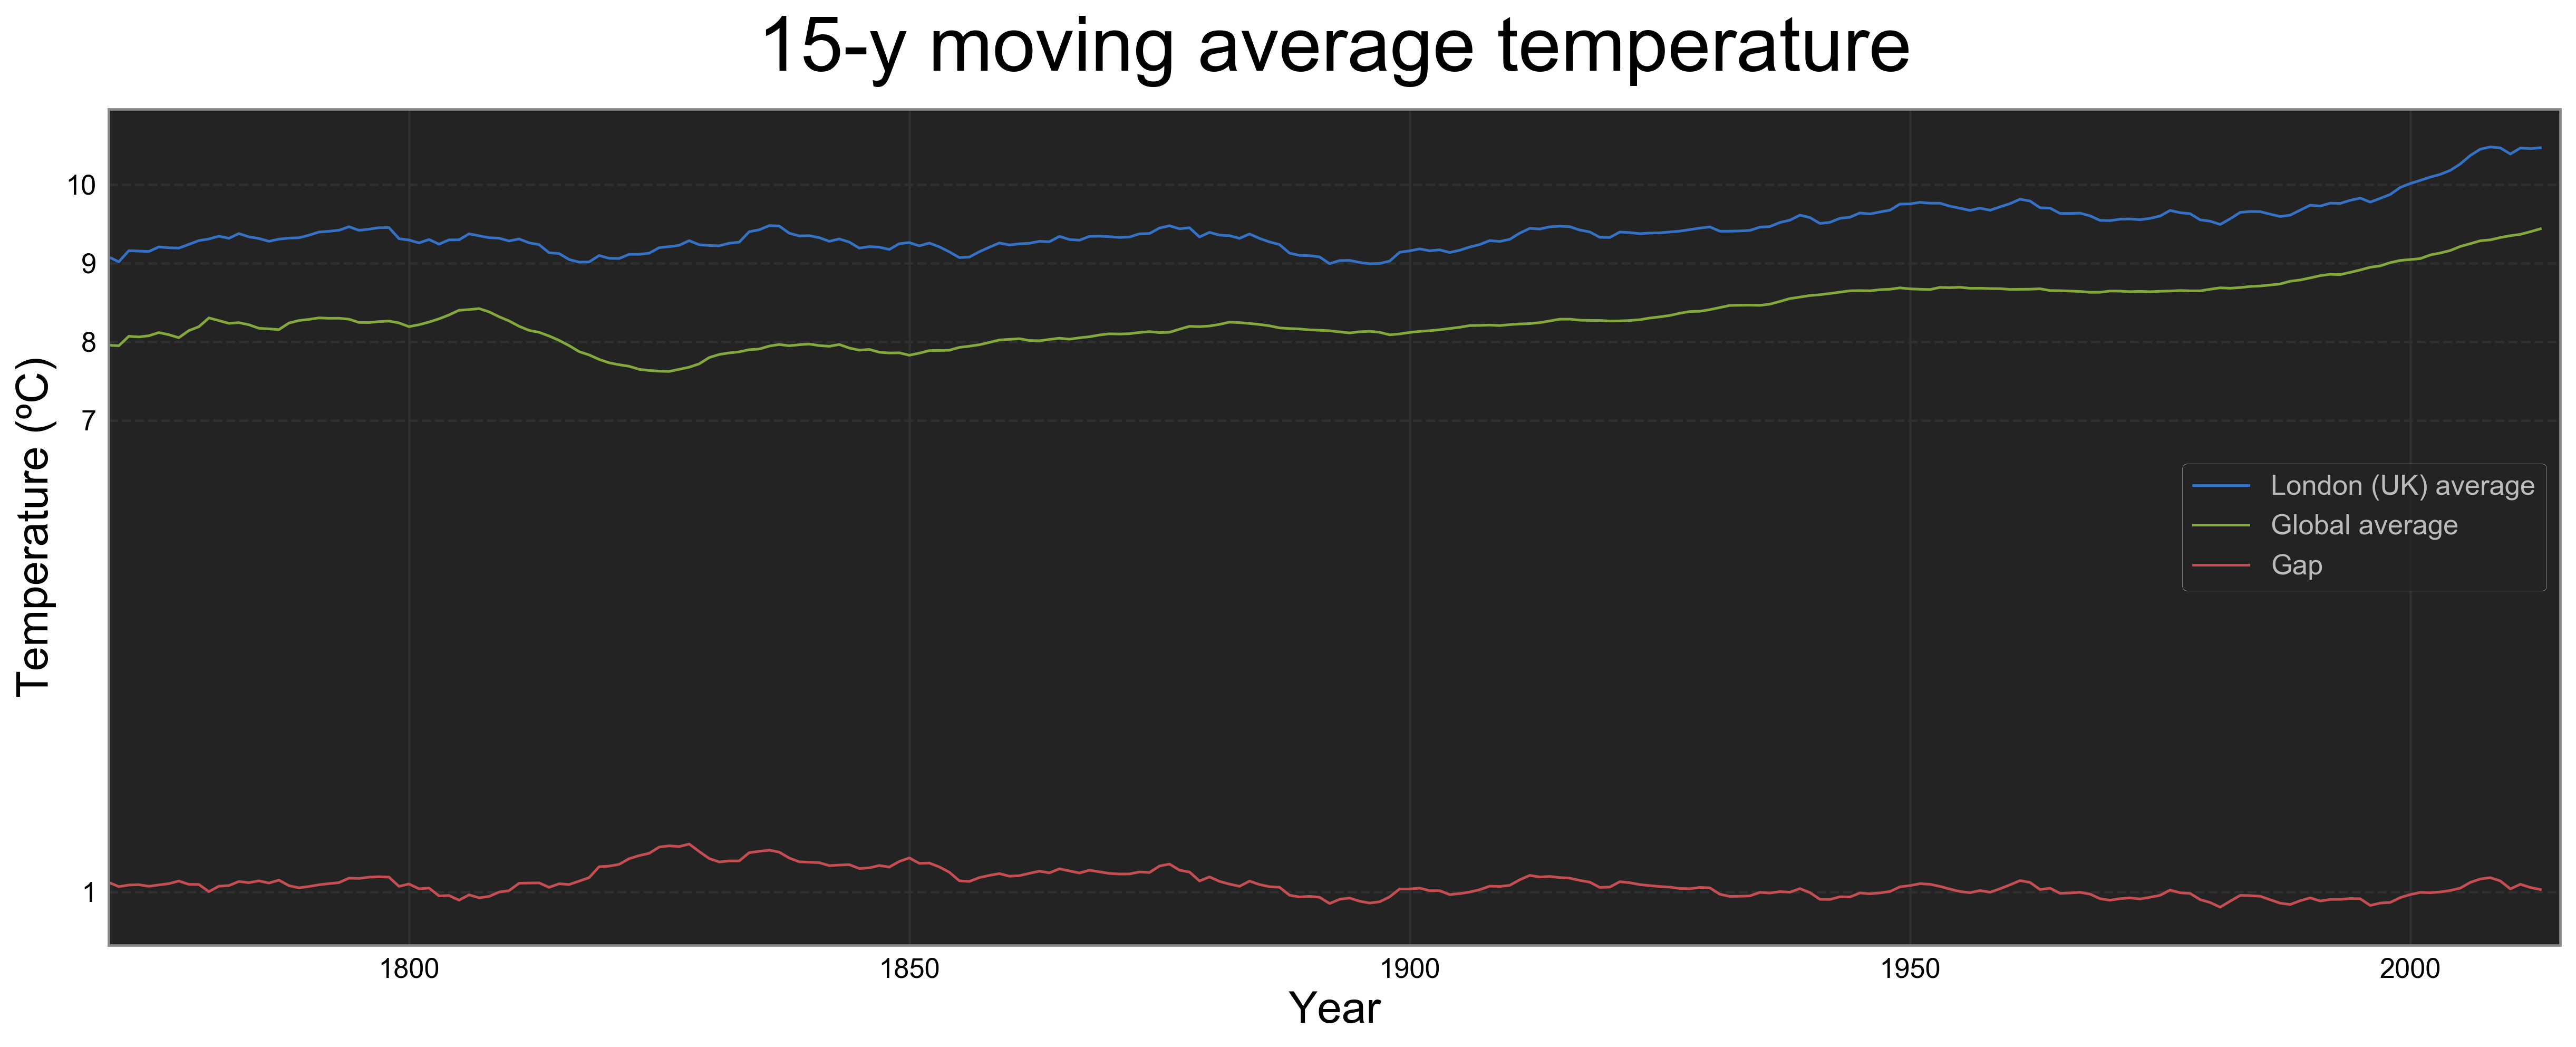

In [30]:
#ax1 = plt.subplot(211)
plt.figure(figsize=(20,7), dpi=300)
plt.plot(df.year, df.mvg_average, label = 'London (UK) average')
plt.plot(df.year, df.mvg_average_global, label = 'Global average')
plt.plot(df.year, df.difference, label = 'Gap')
plt.xlabel('Year', fontsize=20).set_color("black")
plt.ylabel('Temperature (ºC)', fontsize=20).set_color("black")
plt.title('15-y moving average temperature', y=1.03, fontsize=35).set_color("black")
plt.yticks([1,7,8,9,10])
plt.xlim((1770,2015))
plt.tick_params('both', colors='black')
plt.grid(axis='y', linestyle='--')
plt.legend(loc=0);

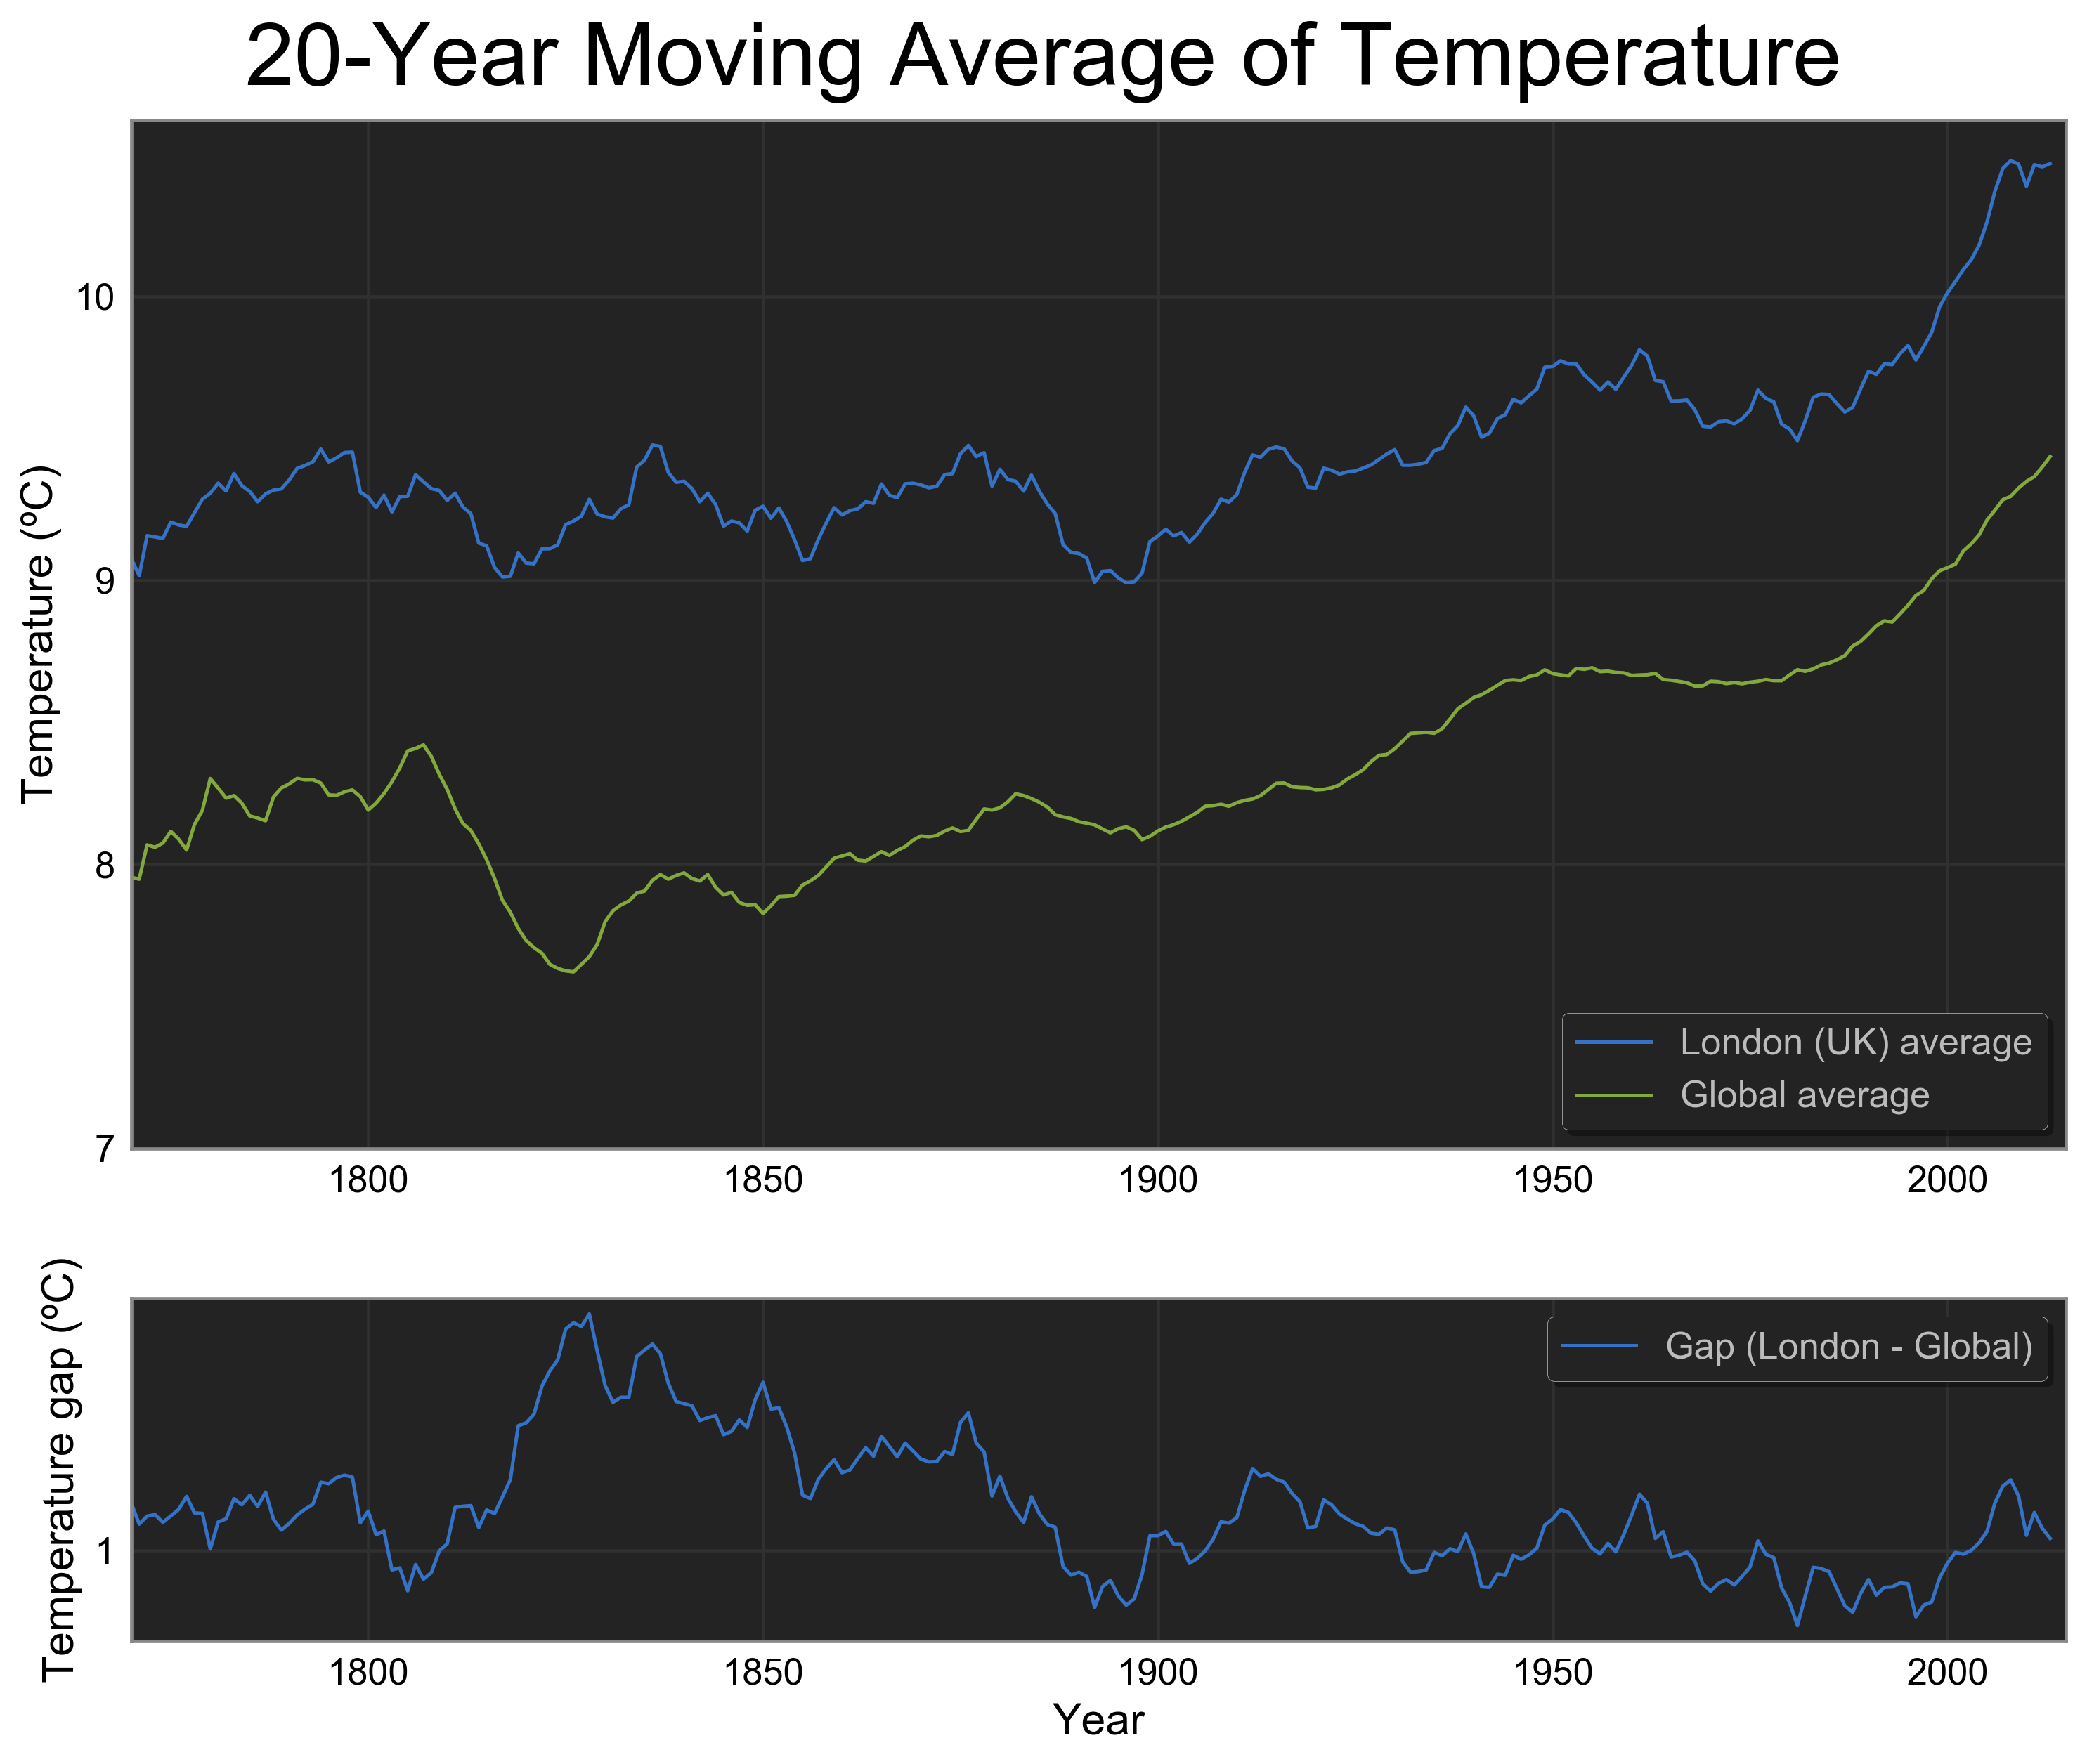

In [105]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2,1, height_ratios=[3, 1])
fig = plt.figure()

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = (300)
fig.suptitle('20-Year Moving Average of Temperature', y=1.04, fontsize=30).set_color("black")

#First plot
ax = fig.add_subplot(gs[0])
ax.plot(df.year, df.mvg_average, label = 'London (UK) average')
ax.plot(df.year, df.mvg_average_global, label = 'Global average')
ax.set_xlim((1770,2015))
ax.set_ylabel('Temperature (ºC)', fontsize=15).set_color("black")
ax.set_yticks([7,8,9,10])
ax.tick_params(axis='both', colors='black')
ax.legend(loc=4, shadow=True)

#Second plot
ax = fig.add_subplot(gs[1], sharex=ax)
ax.plot(df.year, df.difference, label = 'Gap')
ax.set_xlabel('Year', fontsize=15).set_color("black")
ax.set_ylabel('Temperature gap (ºC)', fontsize=15).set_color("black")
ax.set_yticks([1])
ax.tick_params(axis='both', colors='black')
ax.legend(loc=1, shadow=True).get_texts()[0].set_text('Gap (London - Global)')

plt.tight_layout()
plt.show();

Observations:

1. It is clear that London's average temperature has always been above the global average. As a conclusion, London has in average a nicer temperature than most of the world's major cities. As someone livingin London, I'd suggest to further investigate the rain data to find out if the weather is so much better..
2. As expected the global average temparature has increased over years and London's is following the same trend. The global average oscillates around the y-axis=8 and the London average oscillates around the y-axis=9 until 1900 before increasing heavily. Over 263 years, the London average temperature and the global average temperature have gained about 1.5ºC.
3. The temperature gap between London and the world is stable over years and oscillates around 1ºC difference. Therefore, the London's average temperature has evolved in the same fashion than the global average. 
4. The average temperatures are oscillating at the same level from 1720 to 1900. The global average is alternatively above and below the level of 8ºC. The London average is oscillating around the level of 9.2ºC. After the year, the temperature increase heavily up to 9.4ºC for the global average and 10.5ºC for the London average in 2013. It has never decreased significantly since then. We can presume that the dataset reflects the effect of the global warming since the second industrial revolution in the late 19th century. 